## Inference for simple linear regression

### A hypothesis test for $\beta$
We can find optimal point estimates for $\beta_{0},\beta_{1}$ by minimizing the least squares function, but point estimates do not give us information about how $\beta_{0},\beta_{1}$ with different samples from our population. 
Every sample of data would give us a different "optimal" point estimate for $\beta_{0},\beta_{1}$.
It is natural to ask whether or not $\beta_{1}$ will be statistically different than zero---whether or not a relationship between random variables $X$ and $Y$ is probable.

A natural hypothesis to test $\beta_{1}$ is 

\begin{align}
    H_{\text{null}} : \beta_{1} &= 0 \\ 
    H_{\text{Alte.}}: \beta_{1} &\neq 0 \\ 
\end{align}

If we can collect enough data to disprove that $\beta_{1}=0$ then there may be a relationship between $X$ and $Y$. 
In addition to a hypothesis, we need a signfiicance level $\alpha$ and most important: a test statistic. 

#### Test statistic

A (probably expected by now) test statistic for $\beta_{1}$ is 

\begin{align}
    t = \frac{\beta_{1} - \beta_{1\text{ Null}}}{se(\beta_{1})}
\end{align}

From above, our null value for $\beta_{1}$ ($\beta_{1\text{ Null}}$) is zero. 

\begin{align}
    t = \frac{\beta_{1} - 0}{se(\beta_{1})} = \frac{\beta_{1} }{se(\beta_{1})}
\end{align}

If we can find an expression for the standard error of $\beta_{1}$ then we can compute our test statistic and compare our test stat to a distribution when we assume the null hypothesis, when we assume that $\beta_{1}$ is zero.

The standard error (you'll derive in this week's homework) for $\beta_{1}$ is 

\begin{align}
    se(\beta_{1}) = \frac{\sigma^{2}}{ \sum_{i}{ \left(x_{i} - \bar{x}\right)^{2}}}
\end{align}

where $\sigma^{2}$ is the variance from our linear regression. 

#### pvalue

If we can show that our estimate of $\beta_{1}$ is normally distributed then we know (from an earlier class) our test will have a student's t distribution. 
It turns out (you'll show in your homework) that we assumed $y_{1},y_{2},\cdots,y_{n}$ come from a normal distribution and any linear combination of random variables following a normal distribution also has a normal distribution.
We will see (in your homework) that the estimate for $\beta_{1}$ is a linear combination of Ys which are normally distributed.
So we can assume then $\beta_{1}$ follows a normal ditribution and our test statistic has a student's t distribution.

The two-sided pvalue from our hypothesis test is computed as 

\begin{align}
    \text{pvalue} = p( T_{null} > t_{\text{observed}} ) + p( T_{null} < -t_{\text{observed}} )
\end{align}

Small pvalues indicate the null hypothesis is unlikely and that $\beta_{1}$ is probably not zero. 

### Example dataset

The data is a classic set of $442$ diabetes patients. 
The [dataset](https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html) contains 10 variables related to diabetes and a continuous measure of diseaese progression.

We will plot one of the covariates---BMI--- against this measure of disease prgoression and fit a simple linear regression. 

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.344
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                     230.7
Date:                Mon, 16 Nov 2020   Prob (F-statistic):           3.47e-42
Time:                        10:31:41   Log-Likelihood:                -2454.0
No. Observations:                 442   AIC:                             4912.
Df Residuals:                     440   BIC:                             4920.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        152.1335      2.974     51.162      0.000     146.289     157.978
x1           949.4353     62.515     15.187      0.000     826.570    1072.301
==============================================================================
Omnibus:                       11.674   Durbin-Watson:                   1.848
Prob(Omnibus):                  0.003   Jarque-Bera (JB):                7.310
Skew:                           0.156   Prob(JB):                       0.0259
Kurtosis:                       2.453   Cond. No.                         21.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

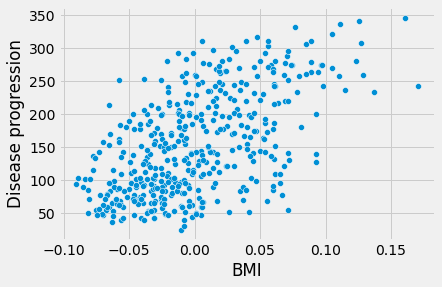

In [27]:
import seaborn as sns
from statsmodels.regression.linear_model import OLS
import statsmodels.api as sm

import sklearn
from sklearn.datasets import load_diabetes

X, y = load_diabetes(return_X_y=True)
bmi = X[:,2]

bmi=sm.add_constant(bmi)
plt.style.use("fivethirtyeight")

fig,ax = plt.subplots()
sns.scatterplot(bmi[:,1],y, ax=ax)

ax.set_xlabel("BMI")
ax.set_ylabel("Disease progression")

results = OLS(y,bmi).fit()
results.summary()

## $R^{2}$

The coefficient of determination ($R^2$) describes one minus the variance in the errors made by a regression model divided by the variance in errors if we used the mean as a predictor. 
If we call the variance in errors made by a regression model $SSE$ and variance in errors made by using the simple mean as $SST$ then 

$$
R^2 = 1 - \frac{SSE}{SST}
$$

Values of $R^{2}$ close to 1 mean we make smaller errors whe nusing our regression model and values of $R^{2}$ clsoe to zero says our errors using a regression model are the same as if we used the simple mean. 

How do we find the variance of the errors made when we choose a regression model?
Well that is 

$$
    SSE = \sum_{i} \left( y_{i} - \hat{y}_{i} \right)^{2}
$$
where $\hat{y}_{i}$ is our prediction of the true value $y_{i}$ form our regression.
We can do the same for $\bar{y}$. 

$$
    SST = \sum_{i} \left( y_{i} - \bar{y} \right)^{2}
$$

The acronym **SSE** stands for "Sum Squares Error" and the acronym **SST** stands for "Sum Squares Total". 
The expression for $R^2$ is then the relative reduction in variance from our regression model. 